In [434]:
from statsmodels.tsa.arima.model import ARIMA
import pickle
import pandas as pd
import numpy as np
from pmdarima.arima import ARIMA
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.model_selection import *
from scipy.stats import boxcox

In [28]:
data = pickle.load(open(r'../Data/deltaQ100-10.pkl', 'rb'))

In [443]:
Y = []
for elt in data.values():
    y = np.log10(elt['cycle_life'])
    Y.append(y)

In [461]:
X = []
for elt in data.values():
    times = boxcox(elt['DeltaQ']+1)[0]
    
    # training ARIMA

    TEST_SIZE = 10
    train, test = times[:-TEST_SIZE], times[-TEST_SIZE:]
    x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], times.shape[0]))

    model = ARIMA(order = (5, 0, 0),maxiter=100)
    model.fit(train)

    X.append(model.params())
print(X)


/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/p

/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[array([-4.00477932e-06,  4.09205719e+00, -6.75002157e+00,  5.67521443e+00,
       -2.47209697e+00,  4.54836490e-01,  4.50210288e-11]), array([-4.82031515e-06,  4.18517049e+00, -7.02324231e+00,  5.91779356e+00,
       -2.51081121e+00,  4.31063639e-01,  2.61027246e-11]), array([-4.52749819e-06,  4.31241193e+00, -7.47048744e+00,  6.51192410e+00,
       -2.86435784e+00,  5.10501359e-01,  3.69429940e-11]), array([-4.01622274e-06,  4.29328273e+00, -7.37469169e+00,  6.33755268e+00,
       -2.72688547e+00,  4.70733512e-01,  4.48143595e-11]), array([-4.43135691e-06,  4.16860121e+00, -6.96962637e+00,  5.86532062e+00,
       -2.49815318e+00,  4.33840740e-01,  2.63370818e-11]), array([-6.81354908e-07,  4.28209724e+00, -7.35314641e+00,  6.34076729e+00,
       -2.75225263e+00,  4.82534205e-01,  9.35879205e-11]), array([-3.65406367e-06,  4.22104115e+00, -7.14689324e+00,  6.08329003e+00,
       -2.61241583e+00,  4.54972443e-01,  4.14195321e-11]), array([-3.89773005e-06,  4.20603777e+00, -7.13940751e+

/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-0.004731411033319292


/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


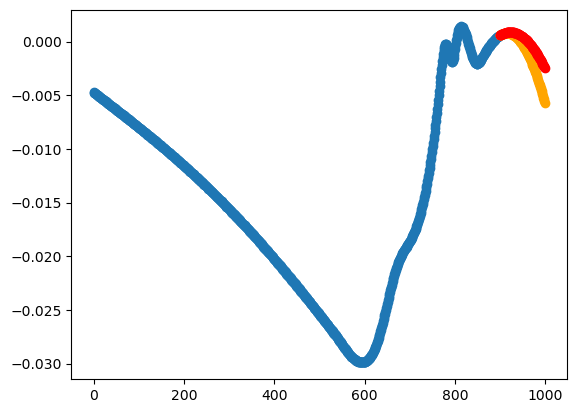

In [533]:
elt = list(data.values())[70]
y = elt['cycle_life']
times = boxcox(elt['DeltaQ']+1)[0]
print(times[0])
# training ARIMA

TEST_SIZE = 100
train, test = times[:-TEST_SIZE], times[-TEST_SIZE:]
X_train, X_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], times.shape[0]))

model = ARIMA(order = (7, 2, 7),maxiter=100)

model.fit(train)

model.summary()

prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)
plt.scatter(X_train, train)
plt.scatter(X_test,test, color='orange')
plt.scatter(X_test, prediction, color = 'red')

In [390]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  900
Model:               SARIMAX(4, 1, 0)   Log Likelihood               10415.946
Date:                Fri, 30 Jun 2023   AIC                         -20821.893
Time:                        14:06:13   BIC                         -20797.886
Sample:                             0   HQIC                        -20812.722
                                - 900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.9411      0.001   5805.853      0.000       2.940       2.942
ar.L2         -3.0480      0.000  -1.58e+04      0.000      -3.048      -3.048
ar.L3          1.2363      0.000   9050.812      0.0

In [462]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [463]:
X = np.abs(np.array(X))
Y = np.array(Y)
x_train = X[train_ind]
y_train = Y[train_ind]

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

x_test = X[test_ind]
y_test = Y[test_ind]

x_test = scaler.transform(x_test)


x_stest = X[secondary_ind]
y_stest = Y[secondary_ind]

x_stest = scaler.transform(x_stest)

# regressor.fit(x_train.reshape(-1, 1),y_train)

In [464]:
# Create the random grid
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

regressor = SVR()

param_grid = {'C': np.logspace(-3, -1, base=10, num=1000), 
              'kernel': ['linear','rbf'],
              'gamma': np.logspace(-2, 0, base=10, num=50),
              'epsilon': np.logspace(-5, 0, base=10, num=50)} 
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 10000, cv=folds, param_distributions = param_grid ,scoring=my_scorer, random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([0.001     , 0.00100462, 0.00100926, 0.00101393, 0.00101861,
       0.00102332, 0.00102804, 0.00103279, 0.00103757, 0.00104236,
       0.00104718, 0.00105202, 0.00105688, 0.00106176, 0.00106666,
       0.00107159, 0.00107654, 0.00108152, 0.00108652, 0.0010...
       0.10481131, 0.11513954, 0.12648552, 0.13894955, 0.1526418 ,
       0.16768329, 0.184207  , 0.20235896, 0.22229965, 0.24420531,
       0.26826958, 0.29470517, 0.32374575, 0.35564803, 0.39069399,
       0.42919343, 0.47148664, 0.51794747, 0.5689866 , 0.62505519,
       0.68664885, 0.75431201, 0.82864277, 0.91029818, 1.        ]),
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                 

[CV] END C=0.05078152112327673, epsilon=0.037275937203149416, gamma=0.0372759372031494, kernel=linear; total time=   0.0s
[CV] END C=0.002572825967447932, epsilon=1.0, gamma=0.028117686979742307, kernel=linear; total time=   0.0s
[CV] END C=0.002572825967447932, epsilon=1.0, gamma=0.028117686979742307, kernel=linear; total time=   0.0s
[CV] END C=0.002572825967447932, epsilon=1.0, gamma=0.028117686979742307, kernel=linear; total time=   0.0s
[CV] END C=0.002572825967447932, epsilon=1.0, gamma=0.028117686979742307, kernel=linear; total time=   0.0s
[CV] END C=0.0012362095437367692, epsilon=0.6250551925273976, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=0.0012362095437367692, epsilon=0.6250551925273976, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=0.0012362095437367692, epsilon=0.6250551925273976, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=0.0012362095437367692, epsilon=0.6250551925273976, gamma=0.0790604321090769

[CV] END C=0.009483681866285927, epsilon=0.0022229964825261957, gamma=0.22229964825261944, kernel=rbf; total time=   0.0s
[CV] END C=0.011092898648952227, epsilon=0.0006866488450042998, gamma=0.8286427728546842, kernel=rbf; total time=   0.0s
[CV] END C=0.006468607661546328, epsilon=0.005689866029018299, gamma=0.5689866029018296, kernel=rbf; total time=   0.0s
[CV] END C=0.006468607661546328, epsilon=0.005689866029018299, gamma=0.5689866029018296, kernel=rbf; total time=   0.0s
[CV] END C=0.006468607661546328, epsilon=0.005689866029018299, gamma=0.5689866029018296, kernel=rbf; total time=   0.0s
[CV] END C=0.006468607661546328, epsilon=0.005689866029018299, gamma=0.5689866029018296, kernel=rbf; total time=   0.0s
[CV] END C=0.04939621743878321, epsilon=0.023299518105153717, gamma=0.517947467923121, kernel=linear; total time=   0.0s
[CV] END C=0.04939621743878321, epsilon=0.023299518105153717, gamma=0.517947467923121, kernel=linear; total time=   0.0s
[CV] END C=0.04939621743878321, eps

[CV] END C=0.04051423171114647, epsilon=0.005689866029018299, gamma=0.18420699693267154, kernel=rbf; total time=   0.0s
[CV] END C=0.07796360130405233, epsilon=1.5998587196060572e-05, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=0.07796360130405233, epsilon=1.5998587196060572e-05, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=0.07796360130405233, epsilon=1.5998587196060572e-05, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=0.07796360130405233, epsilon=1.5998587196060572e-05, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=0.0017467962151272458, epsilon=3.237457542817647e-05, gamma=0.010985411419875584, kernel=linear; total time=   0.0s
[CV] END C=0.0017467962151272458, epsilon=3.237457542817647e-05, gamma=0.010985411419875584, kernel=linear; total time=   0.0s
[CV] END C=0.0017467962151272458, epsilon=3.237457542817647e-05, gamma=0.010985411419875584, kernel=linear; total time=   0.0s
[CV

[CV] END C=0.0011805165285688056, epsilon=1.2648552168552958e-05, gamma=0.021209508879201904, kernel=linear; total time=   0.0s
[CV] END C=0.04827070965603183, epsilon=0.09540954763499944, gamma=0.054286754393238594, kernel=rbf; total time=   0.0s
[CV] END C=0.04827070965603183, epsilon=0.09540954763499944, gamma=0.054286754393238594, kernel=rbf; total time=   0.0s
[CV] END C=0.04827070965603183, epsilon=0.09540954763499944, gamma=0.054286754393238594, kernel=rbf; total time=   0.0s
[CV] END C=0.04827070965603183, epsilon=0.09540954763499944, gamma=0.054286754393238594, kernel=rbf; total time=   0.0s
[CV] END C=0.0512518692705333, epsilon=0.029470517025518096, gamma=0.2442053094548651, kernel=linear; total time=   0.0s
[CV] END C=0.0512518692705333, epsilon=0.029470517025518096, gamma=0.2442053094548651, kernel=linear; total time=   0.0s
[CV] END C=0.0512518692705333, epsilon=0.029470517025518096, gamma=0.2442053094548651, kernel=linear; total time=   0.0s
[CV] END C=0.0512518692705333

[CV] END C=0.03528154115380883, epsilon=0.00016768329368110083, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.03528154115380883, epsilon=0.00016768329368110083, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.011669898186171469, epsilon=1.0, gamma=0.8286427728546842, kernel=rbf; total time=   0.0s
[CV] END C=0.011669898186171469, epsilon=1.0, gamma=0.8286427728546842, kernel=rbf; total time=   0.0s
[CV] END C=0.011669898186171469, epsilon=1.0, gamma=0.8286427728546842, kernel=rbf; total time=   0.0s
[CV] END C=0.011669898186171469, epsilon=1.0, gamma=0.8286427728546842, kernel=rbf; total time=   0.0s
[CV] END C=0.06050367879391221, epsilon=6.55128556859551e-05, gamma=0.017575106248547922, kernel=linear; total time=   0.0s
[CV] END C=0.06050367879391221, epsilon=6.55128556859551e-05, gamma=0.017575106248547922, kernel=linear; total time=   0.0s
[CV] END C=0.06050367879391221, epsilon=6.55128556859551e-05, gamma=0.017575106248547922, kern

[CV] END C=0.00760117761795533, epsilon=0.49417133613238384, gamma=0.20235896477251566, kernel=linear; total time=   0.0s
[CV] END C=0.00760117761795533, epsilon=0.49417133613238384, gamma=0.20235896477251566, kernel=linear; total time=   0.0s
[CV] END C=0.054668572997201806, epsilon=0.0005428675439323859, gamma=0.08685113737513525, kernel=rbf; total time=   0.0s
[CV] END C=0.054668572997201806, epsilon=0.0005428675439323859, gamma=0.08685113737513525, kernel=rbf; total time=   0.0s
[CV] END C=0.054668572997201806, epsilon=0.0005428675439323859, gamma=0.08685113737513525, kernel=rbf; total time=   0.0s
[CV] END C=0.054668572997201806, epsilon=0.0005428675439323859, gamma=0.08685113737513525, kernel=rbf; total time=   0.0s
[CV] END C=0.004042095839796306, epsilon=0.15264179671752334, gamma=0.18420699693267154, kernel=rbf; total time=   0.0s
[CV] END C=0.004042095839796306, epsilon=0.15264179671752334, gamma=0.18420699693267154, kernel=rbf; total time=   0.0s
[CV] END C=0.004042095839796

[CV] END C=0.037288213071828336, epsilon=1.5998587196060572e-05, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.037288213071828336, epsilon=1.5998587196060572e-05, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.037288213071828336, epsilon=1.5998587196060572e-05, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.0022302232979659387, epsilon=0.014563484775012445, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.0022302232979659387, epsilon=0.014563484775012445, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.0022302232979659387, epsilon=0.014563484775012445, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.0022302232979659387, epsilon=0.014563484775012445, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.02988652873550384, epsilon=3.237457542817647e-05, gamma=0.0655128556859551, kernel=linear; total time=   0.0s

[CV] END C=0.001111849604819271, epsilon=0.011513953993264481, gamma=0.04498432668969444, kernel=rbf; total time=   0.0s
[CV] END C=0.001111849604819271, epsilon=0.011513953993264481, gamma=0.04498432668969444, kernel=rbf; total time=   0.0s
[CV] END C=0.0017875255259042354, epsilon=1.5998587196060572e-05, gamma=0.20235896477251566, kernel=rbf; total time=   0.0s
[CV] END C=0.0017875255259042354, epsilon=1.5998587196060572e-05, gamma=0.20235896477251566, kernel=rbf; total time=   0.0s
[CV] END C=0.0017875255259042354, epsilon=1.5998587196060572e-05, gamma=0.20235896477251566, kernel=rbf; total time=   0.0s
[CV] END C=0.0017875255259042354, epsilon=1.5998587196060572e-05, gamma=0.20235896477251566, kernel=rbf; total time=   0.0s
[CV] END C=0.01216424293857368, epsilon=2.0235896477251556e-05, gamma=0.014563484775012436, kernel=rbf; total time=   0.0s
[CV] END C=0.01216424293857368, epsilon=2.0235896477251556e-05, gamma=0.014563484775012436, kernel=rbf; total time=   0.0s
[CV] END C=0.012

[CV] END C=0.0013005112521734085, epsilon=0.023299518105153717, gamma=0.021209508879201904, kernel=linear; total time=   0.0s
[CV] END C=0.0013005112521734085, epsilon=0.023299518105153717, gamma=0.021209508879201904, kernel=linear; total time=   0.0s
[CV] END C=0.0013005112521734085, epsilon=0.023299518105153717, gamma=0.021209508879201904, kernel=linear; total time=   0.0s
[CV] END C=0.006350425168595962, epsilon=0.09540954763499944, gamma=0.12648552168552957, kernel=linear; total time=   0.0s
[CV] END C=0.006350425168595962, epsilon=0.09540954763499944, gamma=0.12648552168552957, kernel=linear; total time=   0.0s
[CV] END C=0.006350425168595962, epsilon=0.09540954763499944, gamma=0.12648552168552957, kernel=linear; total time=   0.0s
[CV] END C=0.006350425168595962, epsilon=0.09540954763499944, gamma=0.12648552168552957, kernel=linear; total time=   0.0s
[CV] END C=0.0053793615039806975, epsilon=0.3906939937054621, gamma=0.1151395399326447, kernel=rbf; total time=   0.0s
[CV] END C=

[CV] END C=0.019828839491270712, epsilon=0.0022229964825261957, gamma=0.32374575428176433, kernel=linear; total time=   0.0s
[CV] END C=0.019828839491270712, epsilon=0.0022229964825261957, gamma=0.32374575428176433, kernel=linear; total time=   0.0s
[CV] END C=0.019828839491270712, epsilon=0.0022229964825261957, gamma=0.32374575428176433, kernel=linear; total time=   0.0s
[CV] END C=0.019828839491270712, epsilon=0.0022229964825261957, gamma=0.32374575428176433, kernel=linear; total time=   0.0s
[CV] END C=0.0013744790926775367, epsilon=1.5998587196060572e-05, gamma=0.22229964825261944, kernel=linear; total time=   0.0s
[CV] END C=0.0013744790926775367, epsilon=1.5998587196060572e-05, gamma=0.22229964825261944, kernel=linear; total time=   0.0s
[CV] END C=0.0013744790926775367, epsilon=1.5998587196060572e-05, gamma=0.22229964825261944, kernel=linear; total time=   0.0s
[CV] END C=0.0013744790926775367, epsilon=1.5998587196060572e-05, gamma=0.22229964825261944, kernel=linear; total time=

[CV] END C=0.04760775230226368, epsilon=0.0071968567300115215, gamma=0.019306977288832496, kernel=linear; total time=   0.0s
[CV] END C=0.04760775230226368, epsilon=0.0071968567300115215, gamma=0.019306977288832496, kernel=linear; total time=   0.0s
[CV] END C=0.04652299523960189, epsilon=0.09540954763499944, gamma=0.18420699693267154, kernel=linear; total time=   0.0s
[CV] END C=0.04652299523960189, epsilon=0.09540954763499944, gamma=0.18420699693267154, kernel=linear; total time=   0.0s
[CV] END C=0.04652299523960189, epsilon=0.09540954763499944, gamma=0.18420699693267154, kernel=linear; total time=   0.0s
[CV] END C=0.04652299523960189, epsilon=0.09540954763499944, gamma=0.18420699693267154, kernel=linear; total time=   0.0s
[CV] END C=0.031441083031472646, epsilon=0.1206792640639329, gamma=0.517947467923121, kernel=rbf; total time=   0.0s
[CV] END C=0.031441083031472646, epsilon=0.1206792640639329, gamma=0.517947467923121, kernel=rbf; total time=   0.0s
[CV] END C=0.031441083031472

[CV] END C=0.004793808495089107, epsilon=0.00016768329368110083, gamma=0.07196856730011521, kernel=rbf; total time=   0.0s
[CV] END C=0.002209756114795903, epsilon=0.04714866363457394, gamma=0.18420699693267154, kernel=rbf; total time=   0.0s
[CV] END C=0.002209756114795903, epsilon=0.04714866363457394, gamma=0.18420699693267154, kernel=rbf; total time=   0.0s
[CV] END C=0.08015006961565405, epsilon=0.09540954763499944, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.08015006961565405, epsilon=0.09540954763499944, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.08015006961565405, epsilon=0.09540954763499944, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.08015006961565405, epsilon=0.09540954763499944, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.05777790117970504, epsilon=1e-05, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.05777790117970504, epsilon=1

[CV] END C=0.0012080421346773289, epsilon=0.09540954763499944, gamma=0.07906043210907697, kernel=linear; total time=   0.0s
[CV] END C=0.013524808704178755, epsilon=2.559547922699533e-05, gamma=0.8286427728546842, kernel=linear; total time=   0.0s
[CV] END C=0.013524808704178755, epsilon=2.559547922699533e-05, gamma=0.8286427728546842, kernel=linear; total time=   0.0s
[CV] END C=0.013524808704178755, epsilon=2.559547922699533e-05, gamma=0.8286427728546842, kernel=linear; total time=   0.0s
[CV] END C=0.013524808704178755, epsilon=2.559547922699533e-05, gamma=0.8286427728546842, kernel=linear; total time=   0.0s
[CV] END C=0.003503842245290676, epsilon=0.00021209508879201905, gamma=0.010985411419875584, kernel=rbf; total time=   0.0s
[CV] END C=0.003503842245290676, epsilon=0.00021209508879201905, gamma=0.010985411419875584, kernel=rbf; total time=   0.0s
[CV] END C=0.003503842245290676, epsilon=0.00021209508879201905, gamma=0.010985411419875584, kernel=rbf; total time=   0.0s
[CV] END

[CV] END C=0.014426439512181581, epsilon=0.1206792640639329, gamma=0.04498432668969444, kernel=rbf; total time=   0.0s
[CV] END C=0.014426439512181581, epsilon=0.1206792640639329, gamma=0.04498432668969444, kernel=rbf; total time=   0.0s
[CV] END C=0.06513490946272803, epsilon=0.004498432668969444, gamma=0.2442053094548651, kernel=rbf; total time=   0.0s
[CV] END C=0.06513490946272803, epsilon=0.004498432668969444, gamma=0.2442053094548651, kernel=rbf; total time=   0.0s
[CV] END C=0.06513490946272803, epsilon=0.004498432668969444, gamma=0.2442053094548651, kernel=rbf; total time=   0.0s
[CV] END C=0.06513490946272803, epsilon=0.004498432668969444, gamma=0.2442053094548651, kernel=rbf; total time=   0.0s
[CV] END C=0.004271993966306777, epsilon=0.023299518105153717, gamma=0.019306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.004271993966306777, epsilon=0.023299518105153717, gamma=0.019306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.004271993966306777, epsilon=0

[CV] END C=0.011509622008850324, epsilon=2.0235896477251556e-05, gamma=0.030888435964774818, kernel=linear; total time=   0.0s
[CV] END C=0.02319345059274429, epsilon=3.237457542817647e-05, gamma=0.42919342601287763, kernel=linear; total time=   0.0s
[CV] END C=0.02319345059274429, epsilon=3.237457542817647e-05, gamma=0.42919342601287763, kernel=linear; total time=   0.0s
[CV] END C=0.02319345059274429, epsilon=3.237457542817647e-05, gamma=0.42919342601287763, kernel=linear; total time=   0.0s
[CV] END C=0.02319345059274429, epsilon=3.237457542817647e-05, gamma=0.42919342601287763, kernel=linear; total time=   0.0s
[CV] END C=0.1, epsilon=0.15264179671752334, gamma=0.015998587196060583, kernel=rbf; total time=   0.0s
[CV] END C=0.1, epsilon=0.15264179671752334, gamma=0.015998587196060583, kernel=rbf; total time=   0.0s
[CV] END C=0.1, epsilon=0.15264179671752334, gamma=0.015998587196060583, kernel=rbf; total time=   0.0s
[CV] END C=0.1, epsilon=0.15264179671752334, gamma=0.015998587196

[CV] END C=0.002052637752709252, epsilon=0.15264179671752334, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] END C=0.002052637752709252, epsilon=0.15264179671752334, gamma=0.7543120063354615, kernel=linear; total time=   0.0s907697, kernel=rbf; total time=   0.0s
[CV] END C=0.0011430311291144787, epsilon=0.005689866029018299, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=0.0011430311291144787, epsilon=0.005689866029018299, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=0.03292437333007769, epsilon=0.0071968567300115215, gamma=0.030888435964774818, kernel=linear; total time=   0.0s
[CV] END C=0.03292437333007769, epsilon=0.0071968567300115215, gamma=0.030888435964774818, kernel=linear; total time=   0.0s
[CV] END C=0.03292437333007769, epsilon=0.0071968567300115215, gamma=0.030888435964774818, kernel=linear; total time=   0.0s
[CV] END C=0.03292437333007769, epsilon=0.0071968567300115215, gamma=0.030888435964774818, kernel=l

[CV] END C=0.0013125568357718427, epsilon=6.55128556859551e-05, gamma=0.22229964825261944, kernel=linear; total time=   0.0s
[CV] END C=0.0020812215699863392, epsilon=0.0010985411419875584, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.0020812215699863392, epsilon=0.0010985411419875584, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.0020812215699863392, epsilon=0.0010985411419875584, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.0020812215699863392, epsilon=0.0010985411419875584, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.05724766239702179, epsilon=0.0035564803062231283, gamma=0.0655128556859551, kernel=rbf; total time=   0.0s
[CV] END C=0.05724766239702179, epsilon=0.0035564803062231283, gamma=0.0655128556859551, kernel=rbf; total time=   0.0s
[CV] END C=0.05724766239702179, epsilon=0.0035564803062231283, gamma=0.0655128556859551, kernel=rbf; total time=   0.0s
[CV] END C=0.0572476623

[CV] END C=0.015602464143663687, epsilon=0.001757510624854793, gamma=0.010985411419875584, kernel=linear; total time=   0.0s
[CV] END C=0.015602464143663687, epsilon=0.001757510624854793, gamma=0.010985411419875584, kernel=linear; total time=   0.0s
[CV] END C=0.015602464143663687, epsilon=0.001757510624854793, gamma=0.010985411419875584, kernel=linear; total time=   0.0s
[CV] END C=0.015602464143663687, epsilon=0.001757510624854793, gamma=0.010985411419875584, kernel=linear; total time=   0.0s
[CV] END C=0.0134006889636395, epsilon=0.15264179671752334, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.0134006889636395, epsilon=0.15264179671752334, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.0134006889636395, epsilon=0.15264179671752334, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.0134006889636395, epsilon=0.15264179671752334, gamma=0.47148663634573923, kernel=linear; total time=   0.0s
[CV] END C=0.002

[CV] END C=0.008145371766280746, epsilon=0.1206792640639329, gamma=0.028117686979742307, kernel=rbf; total time=   0.0s
[CV] END C=0.008145371766280746, epsilon=0.1206792640639329, gamma=0.028117686979742307, kernel=rbf; total time=   0.0s
[CV] END C=0.009440064789417604, epsilon=0.05963623316594643, gamma=0.015998587196060583, kernel=linear; total time=   0.0s
[CV] END C=0.009440064789417604, epsilon=0.05963623316594643, gamma=0.015998587196060583, kernel=linear; total time=   0.0s
[CV] END C=0.009440064789417604, epsilon=0.05963623316594643, gamma=0.015998587196060583, kernel=linear; total time=   0.0s
[CV] END C=0.009440064789417604, epsilon=0.05963623316594643, gamma=0.015998587196060583, kernel=linear; total time=   0.0s
[CV] END C=0.001578331405652118, epsilon=0.037275937203149416, gamma=0.017575106248547922, kernel=linear; total time=   0.0s
[CV] END C=0.001578331405652118, epsilon=0.037275937203149416, gamma=0.017575106248547922, kernel=linear; total time=   0.0s
[CV] END C=0.0

[CV] END C=0.03746050032748993, epsilon=0.07543120063354623, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.03746050032748993, epsilon=0.07543120063354623, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.03746050032748993, epsilon=0.07543120063354623, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.03746050032748993, epsilon=0.07543120063354623, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.025316484786313542, epsilon=0.00013257113655901095, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.025316484786313542, epsilon=0.00013257113655901095, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.025316484786313542, epsilon=0.00013257113655901095, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.025316484786313542, epsilon=0.00013257113655901095, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.002

[CV] END C=0.0010865157746525384, epsilon=1.2648552168552958e-05, gamma=0.0655128556859551, kernel=linear; total time=   0.0s
[CV] END C=0.0010865157746525384, epsilon=1.2648552168552958e-05, gamma=0.0655128556859551, kernel=linear; total time=   0.0s
[CV] END C=0.004042095839796306, epsilon=3.237457542817647e-05, gamma=0.12648552168552957, kernel=linear; total time=   0.0s
[CV] END C=0.004042095839796306, epsilon=3.237457542817647e-05, gamma=0.12648552168552957, kernel=linear; total time=   0.0s
[CV] END C=0.004042095839796306, epsilon=3.237457542817647e-05, gamma=0.12648552168552957, kernel=linear; total time=   0.0s
[CV] END C=0.004042095839796306, epsilon=3.237457542817647e-05, gamma=0.12648552168552957, kernel=linear; total time=   0.0s
[CV] END C=0.004291732378422158, epsilon=0.49417133613238384, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=0.004291732378422158, epsilon=0.49417133613238384, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END

[CV] END C=0.01124737178364752, epsilon=0.09540954763499944, gamma=0.29470517025518095, kernel=rbf; total time=   0.0s
[CV] END C=0.01124737178364752, epsilon=0.09540954763499944, gamma=0.29470517025518095, kernel=rbf; total time=   0.0s
[CV] END C=0.00658898955079995, epsilon=0.0005428675439323859, gamma=0.023299518105153717, kernel=rbf; total time=   0.0s
[CV] END C=0.00658898955079995, epsilon=0.0005428675439323859, gamma=0.023299518105153717, kernel=rbf; total time=   0.0s END C=0.00880937190447399, epsilon=0.00021209508879201905, gamma=0.040949150623804234, kernel=rbf; total time=   0.0s
[CV] END C=0.00880937190447399, epsilon=0.00021209508879201905, gamma=0.040949150623804234, kernel=rbf; total time=   0.0s
[CV] END C=0.0029004304938639917, epsilon=0.023299518105153717, gamma=0.07196856730011521, kernel=rbf; total time=   0.0s
[CV] END C=0.0029004304938639917, epsilon=0.023299518105153717, gamma=0.07196856730011521, kernel=rbf; total time=   0.0s
[CV] END C=0.0029004304938639917,

[CV] END C=0.03577285099367873, epsilon=0.0035564803062231283, gamma=0.013257113655901088, kernel=linear; total time=   0.0s
[CV] END C=0.009267593301146883, epsilon=0.30888435964774846, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.009267593301146883, epsilon=0.30888435964774846, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.009267593301146883, epsilon=0.30888435964774846, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.009267593301146883, epsilon=0.30888435964774846, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.001387209780541621, epsilon=0.0005428675439323859, gamma=0.3906939937054615, kernel=linear; total time=   0.0s
[CV] END C=0.001387209780541621, epsilon=0.0005428675439323859, gamma=0.3906939937054615, kernel=linear; total time=   0.0s
[CV] END C=0.001387209780541621, epsilon=0.0005428675439323859, gamma=0.3906939937054615, kernel=linear; total time=   0.0s
[CV] END C=0.00138720978054

[CV] END C=0.006805073696735207, epsilon=3.237457542817647e-05, gamma=0.18420699693267154, kernel=rbf; total time=   0.0s
[CV] END C=0.006805073696735207, epsilon=3.237457542817647e-05, gamma=0.18420699693267154, kernel=rbf; total time=   0.0s
[CV] END C=0.006805073696735207, epsilon=3.237457542817647e-05, gamma=0.18420699693267154, kernel=rbf; total time=   0.0s
[CV] END C=0.006805073696735207, epsilon=3.237457542817647e-05, gamma=0.18420699693267154, kernel=rbf; total time=   0.0s
[CV] END C=0.0061204983724767025, epsilon=0.09540954763499944, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.0061204983724767025, epsilon=0.09540954763499944, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.0061204983724767025, epsilon=0.09540954763499944, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.0061204983724767025, epsilon=0.09540954763499944, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.001

[CV] END C=0.05777790117970504, epsilon=0.009102981779915217, gamma=0.015998587196060583, kernel=linear; total time=   0.0s
[CV] END C=0.05777790117970504, epsilon=0.009102981779915217, gamma=0.015998587196060583, kernel=linear; total time=   0.0s
[CV] END C=0.014162866162991988, epsilon=0.00016768329368110083, gamma=0.18420699693267154, kernel=linear; total time=   0.0s
[CV] END C=0.014162866162991988, epsilon=0.00016768329368110083, gamma=0.18420699693267154, kernel=linear; total time=   0.0s
[CV] END C=0.014162866162991988, epsilon=0.00016768329368110083, gamma=0.18420699693267154, kernel=linear; total time=   0.0s
[CV] END C=0.014162866162991988, epsilon=0.00016768329368110083, gamma=0.18420699693267154, kernel=linear; total time=   0.0s
[CV] END C=0.04717084690917017, epsilon=0.0035564803062231283, gamma=0.040949150623804234, kernel=rbf; total time=   0.0s
[CV] END C=0.04717084690917017, epsilon=0.0035564803062231283, gamma=0.040949150623804234, kernel=rbf; total time=   0.0s
[CV]

[CV] END C=0.011509622008850324, epsilon=0.0006866488450042998, gamma=0.017575106248547922, kernel=rbf; total time=   0.0s
[CV] END C=0.0011169868184678225, epsilon=0.0010985411419875584, gamma=0.03393221771895328, kernel=linear; total time=   0.0s
[CV] END C=0.0011169868184678225, epsilon=0.0010985411419875584, gamma=0.03393221771895328, kernel=linear; total time=   0.0s
[CV] END C=0.0011169868184678225, epsilon=0.0010985411419875584, gamma=0.03393221771895328, kernel=linear; total time=   0.0s
[CV] END C=0.0011169868184678225, epsilon=0.0010985411419875584, gamma=0.03393221771895328, kernel=linear; total time=   0.0s
[CV] END C=0.003254711605531848, epsilon=0.000339322177189533, gamma=0.013257113655901088, kernel=rbf; total time=   0.0s
[CV] END C=0.003254711605531848, epsilon=0.000339322177189533, gamma=0.013257113655901088, kernel=rbf; total time=   0.0s
[CV] END C=0.003254711605531848, epsilon=0.000339322177189533, gamma=0.013257113655901088, kernel=rbf; total time=   0.0s
[CV] EN

[CV] END C=0.01742774678408919, epsilon=5.1794746792312125e-05, gamma=0.5689866029018296, kernel=linear; total time=   0.0s
[CV] END C=0.011509622008850324, epsilon=0.0005428675439323859, gamma=0.6250551925273969, kernel=linear; total time=   0.0s
[CV] END C=0.011509622008850324, epsilon=0.0005428675439323859, gamma=0.6250551925273969, kernel=linear; total time=   0.0s
[CV] END C=0.011509622008850324, epsilon=0.0005428675439323859, gamma=0.6250551925273969, kernel=linear; total time=   0.0s
[CV] END C=0.011509622008850324, epsilon=0.0005428675439323859, gamma=0.6250551925273969, kernel=linear; total time=   0.0s
[CV] END C=0.026510836019085375, epsilon=2.0235896477251556e-05, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] END C=0.026510836019085375, epsilon=2.0235896477251556e-05, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] END C=0.026510836019085375, epsilon=2.0235896477251556e-05, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] 

[CV] END C=0.0032848573660300435, epsilon=8.286427728546843e-05, gamma=0.013257113655901088, kernel=linear; total time=   0.0s
[CV] END C=0.003754694224073337, epsilon=2.0235896477251556e-05, gamma=0.22229964825261944, kernel=rbf; total time=   0.0s
[CV] END C=0.003754694224073337, epsilon=2.0235896477251556e-05, gamma=0.22229964825261944, kernel=rbf; total time=   0.0s
[CV] END C=0.003754694224073337, epsilon=2.0235896477251556e-05, gamma=0.22229964825261944, kernel=rbf; total time=   0.0s
[CV] END C=0.003754694224073337, epsilon=2.0235896477251556e-05, gamma=0.22229964825261944, kernel=rbf; total time=   0.0s
[CV] END C=0.004136343684063274, epsilon=2.559547922699533e-05, gamma=0.10481131341546858, kernel=linear; total time=   0.0s
[CV] END C=0.004136343684063274, epsilon=2.559547922699533e-05, gamma=0.10481131341546858, kernel=linear; total time=   0.0s
[CV] END C=0.004136343684063274, epsilon=2.559547922699533e-05, gamma=0.10481131341546858, kernel=linear; total time=   0.0s
[CV] E

[CV] END C=0.09817298406188836, epsilon=0.49417133613238384, gamma=0.35564803062231287, kernel=linear; total time=   0.0s
[CV] END C=0.006680743915695614, epsilon=0.0002682695795279727, gamma=0.05963623316594643, kernel=rbf; total time=   0.0s
[CV] END C=0.006680743915695614, epsilon=0.0002682695795279727, gamma=0.05963623316594643, kernel=rbf; total time=   0.0s
[CV] END C=0.006680743915695614, epsilon=0.0002682695795279727, gamma=0.05963623316594643, kernel=rbf; total time=   0.0s
[CV] END C=0.006680743915695614, epsilon=0.0002682695795279727, gamma=0.05963623316594643, kernel=rbf; total time=   0.0s
[CV] END C=0.09203731996618221, epsilon=0.000339322177189533, gamma=0.03393221771895328, kernel=linear; total time=   0.0s
[CV] END C=0.09203731996618221, epsilon=0.000339322177189533, gamma=0.03393221771895328, kernel=linear; total time=   0.0s
[CV] END C=0.09203731996618221, epsilon=0.000339322177189533, gamma=0.03393221771895328, kernel=linear; total time=   0.0s
[CV] END C=0.09203731

[CV] END C=0.0642403365939419, epsilon=0.023299518105153717, gamma=0.18420699693267154, kernel=linear; total time=   0.0s
[CV] END C=0.0022199661191199547, epsilon=5.1794746792312125e-05, gamma=0.023299518105153717, kernel=linear; total time=   0.0s
[CV] END C=0.0022199661191199547, epsilon=5.1794746792312125e-05, gamma=0.023299518105153717, kernel=linear; total time=   0.0s
[CV] END C=0.0022199661191199547, epsilon=5.1794746792312125e-05, gamma=0.023299518105153717, kernel=linear; total time=   0.0s
[CV] END C=0.0022199661191199547, epsilon=5.1794746792312125e-05, gamma=0.023299518105153717, kernel=linear; total time=   0.0s
[CV] END C=0.05804485942768978, epsilon=0.009102981779915217, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.05804485942768978, epsilon=0.009102981779915217, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.05804485942768978, epsilon=0.009102981779915217, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.05804485942768978, epsilon=0.

[CV] END C=0.04301635758106795, epsilon=0.023299518105153717, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.052205675278469754, epsilon=8.286427728546843e-05, gamma=0.12648552168552957, kernel=rbf; total time=   0.0s
[CV] END C=0.052205675278469754, epsilon=8.286427728546843e-05, gamma=0.12648552168552957, kernel=rbf; total time=   0.0s
[CV] END C=0.052205675278469754, epsilon=8.286427728546843e-05, gamma=0.12648552168552957, kernel=rbf; total time=   0.0s
[CV] END C=0.052205675278469754, epsilon=8.286427728546843e-05, gamma=0.12648552168552957, kernel=rbf; total time=   0.0s
[CV] END C=0.0033000347911252854, epsilon=1.2648552168552958e-05, gamma=0.030888435964774818, kernel=rbf; total time=   0.0s
[CV] END C=0.0033000347911252854, epsilon=1.2648552168552958e-05, gamma=0.030888435964774818, kernel=rbf; total time=   0.0s
[CV] END C=0.0033000347911252854, epsilon=1.2648552168552958e-05, gamma=0.030888435964774818, kernel=rbf; total time=   0.0s
[CV] END C=0.0

[CV] END C=0.00785045620020451, epsilon=0.49417133613238384, gamma=0.20235896477251566, kernel=rbf; total time=   0.0s
[CV] END C=0.00785045620020451, epsilon=0.49417133613238384, gamma=0.20235896477251566, kernel=rbf; total time=   0.0s
[CV] END C=0.04630902801799739, epsilon=1.5998587196060572e-05, gamma=0.07906043210907697, kernel=linear; total time=   0.0s
[CV] END C=0.04630902801799739, epsilon=1.5998587196060572e-05, gamma=0.07906043210907697, kernel=linear; total time=   0.0s
[CV] END C=0.04630902801799739, epsilon=1.5998587196060572e-05, gamma=0.07906043210907697, kernel=linear; total time=   0.0s
[CV] END C=0.04630902801799739, epsilon=1.5998587196060572e-05, gamma=0.07906043210907697, kernel=linear; total time=   0.0s
[CV] END C=0.04827070965603183, epsilon=0.09540954763499944, gamma=0.42919342601287763, kernel=rbf; total time=   0.0s
[CV] END C=0.04827070965603183, epsilon=0.09540954763499944, gamma=0.42919342601287763, kernel=rbf; total time=   0.0s
[CV] END C=0.04827070965

[CV] END C=0.004331483223376399, epsilon=0.00042919342601287783, gamma=0.025595479226995357, kernel=linear; total time=   0.0s
[CV] END C=0.004331483223376399, epsilon=0.00042919342601287783, gamma=0.025595479226995357, kernel=linear; total time=   0.0s
[CV] END C=0.004331483223376399, epsilon=0.00042919342601287783, gamma=0.025595479226995357, kernel=linear; total time=   0.0s
[CV] END C=0.004331483223376399, epsilon=0.00042919342601287783, gamma=0.025595479226995357, kernel=linear; total time=   0.0s
[CV] END C=0.006619433458774394, epsilon=0.05963623316594643, gamma=0.6866488450042998, kernel=linear; total time=   0.0s
[CV] END C=0.006619433458774394, epsilon=0.05963623316594643, gamma=0.6866488450042998, kernel=linear; total time=   0.0s
[CV] END C=0.006619433458774394, epsilon=0.05963623316594643, gamma=0.6866488450042998, kernel=linear; total time=   0.0s
[CV] END C=0.006619433458774394, epsilon=0.05963623316594643, gamma=0.6866488450042998, kernel=linear; total time=   0.0s
[CV]

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=10000, n_jobs=-1,
                   param_distributions={'C': array([0.001     , 0.00100462, 0.00100926, 0.00101393, 0.00101861,
       0.00102332, 0.00102804, 0.00103279, 0.00103757, 0.00104236,
       0.00104718, 0.00105202, 0.00105688, 0.00106176, 0.00106666,
       0.00107159, 0.00107654, 0.00108152, 0.00108652, 0.0010...
       0.10481131, 0.11513954, 0.12648552, 0.13894955, 0.1526418 ,
       0.16768329, 0.184207  , 0.20235896, 0.22229965, 0.24420531,
       0.26826958, 0.29470517, 0.32374575, 0.35564803, 0.39069399,
       0.42919343, 0.47148664, 0.51794747, 0.5689866 , 0.62505519,
       0.68664885, 0.75431201, 0.82864277, 0.91029818, 1.        ]),
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [465]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -289.40062529869925
Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.9102981779915218, 'epsilon': 0.07543120063354623, 'C': 0.06820776732865685}


In [466]:
# Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.0071968567300115215, 'epsilon': 0.001757510624854793, 'C': 6.513490946272796}

regressor = SVR(kernel=model.best_params_['kernel'],epsilon=model.best_params_['epsilon'], 
                gamma = model.best_params_['gamma'], C=model.best_params_['C'])
regressor.fit(x_train,y_train)

SVR(C=0.06820776732865685, epsilon=0.07543120063354623,
    gamma=0.9102981779915218)

In [467]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_train) - 10**y_train)**2))) 
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test) - 10**y_test)**2))) 
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest) - 10**y_stest)**2))) 

RMSE:  315.36242550201337
RMSE:  406.50736530130143
RMSE:  514.1866671622079


In [407]:
print(regressor.predict(x_test))

[2.80676862 2.80676862 3.37269364 3.2228328  2.77063626 2.66098221
 2.8482543  2.79643772 2.80065404 3.01869447 2.91623035 2.77449214
 3.25816507 2.95465445 3.55172393 2.82260904 2.79868049 2.68155808
 3.24770676 2.72272161 2.67481957 2.7226996  2.73438452 2.83063555
 2.88368582 2.80676834 2.67114727 2.74855852 2.60874351 2.77485271
 2.70857502 2.71319844 2.77058812 3.17193015 3.01769571 2.78064712
 2.86125996 3.30678285 2.80677038 2.61789493 3.05765757 2.7356946
 2.8811022 ]


# Straight time series

In [506]:
X = []
Y = []
for elt in data.values():
    y = np.log10(elt['cycle_life'])
    x = elt['DeltaQ']
    Y.append(y)
    X.append(x)

In [507]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [508]:
X = np.array(X)
Y = np.array(Y)
x_train = X[train_ind]
y_train = Y[train_ind]

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

x_test = X[test_ind]
y_test = Y[test_ind]

x_test = scaler.transform(x_test)


x_stest = X[secondary_ind]
y_stest = Y[secondary_ind]

x_stest = scaler.transform(x_stest)

# regressor.fit(x_train.reshape(-1, 1),y_train)

In [523]:
# Create the random grid
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

regressor = SVR()

param_grid = {'C': np.logspace(-3, 1, base=10, num=1000), 
              'kernel': ['linear','rbf'],
              'gamma': np.logspace(-2, 2, base=10, num=50),
              'epsilon': np.logspace(-3, 0, base=10, num=50)} 
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 5000, cv=folds, param_distributions = param_grid ,scoring=my_scorer, random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=5000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 1.00926219e-03, 1.01861017e-03, 1.02804473e-03,
       1.03756668e-03, 1.04717682e-03, 1.05687597e-03, 1.06666496e-03,
       1.07654461e-03, 1.08651577e-03, 1.09657929e-03, 1.10673602e-03,
       1.11698682e-03, 1.12733256e-03, 1...
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)
Fitting 4

[CV] END C=0.1730765534195726, epsilon=0.0020235896477251575, gamma=0.030888435964774818, kernel=rbf; total time=   0.0s
[CV] END C=0.00013186214013947485, epsilon=0.5689866029018293, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.00013186214013947485, epsilon=0.5689866029018293, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.00013186214013947485, epsilon=0.5689866029018293, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.00013186214013947485, epsilon=0.5689866029018293, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.0004321511127789762, epsilon=0.32374575428176433, gamma=0.014563484775012436, kernel=linear; total time=   0.0s
[CV] END C=0.0004321511127789762, epsilon=0.32374575428176433, gamma=0.014563484775012436, kernel=linear; total time=   0.0s
[CV] END C=0.0004321511127789762, epsilon=0.32374575428176433, gamma=0.014563484775012436, kernel=linear; total time=   0.0s
[CV] END C=0.0004321511127789762

[CV] END C=1.3155856240457038, epsilon=0.012648552168552958, gamma=0.16768329368110074, kernel=linear; total time=   0.3s
[CV] END C=4.463233926710397, epsilon=0.49417133613238334, gamma=1.5998587196060574, kernel=linear; total time=   0.0s
[CV] END C=5.0664610089212685, epsilon=0.21209508879201905, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=5.0664610089212685, epsilon=0.21209508879201905, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=5.0664610089212685, epsilon=0.21209508879201905, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=5.0664610089212685, epsilon=0.21209508879201905, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=0.0036438589837635444, epsilon=0.03393221771895328, gamma=0.054286754393238594, kernel=linear; total time=   0.0s
[CV] END C=0.0036438589837635444, epsilon=0.03393221771895328, gamma=0.054286754393238594, kernel=linear; total time=   0.0s
[CV] END C=0.0036438589837635444, epsilon

[CV] END C=0.2927294835042816, epsilon=0.0026826957952797246, gamma=2.811768697974228, kernel=rbf; total time=   0.0s
[CV] END C=0.0004126820845702952, epsilon=0.0017575106248547913, gamma=0.04498432668969444, kernel=linear; total time=   0.0s
[CV] END C=1.2419213527017847, epsilon=0.006250551925273976, gamma=8.68511373751352, kernel=rbf; total time=   0.0s
[CV] END C=1.2419213527017847, epsilon=0.006250551925273976, gamma=8.68511373751352, kernel=rbf; total time=   0.0s
[CV] END C=1.2419213527017847, epsilon=0.006250551925273976, gamma=8.68511373751352, kernel=rbf; total time=   0.0s
[CV] END C=1.2419213527017847, epsilon=0.006250551925273976, gamma=8.68511373751352, kernel=rbf; total time=   0.0s
[CV] END C=0.018082449348779516, epsilon=0.09102981779915217, gamma=0.20235896477251566, kernel=rbf; total time=   0.0s
[CV] END C=0.018082449348779516, epsilon=0.09102981779915217, gamma=0.20235896477251566, kernel=rbf; total time=   0.0s
[CV] END C=0.018082449348779516, epsilon=0.091029817

[CV] END C=0.003408258547423452, epsilon=0.006250551925273976, gamma=0.1151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.0058447611316336376, epsilon=0.0015264179671752333, gamma=0.04498432668969444, kernel=rbf; total time=   0.0s
[CV] END C=0.0058447611316336376, epsilon=0.0015264179671752333, gamma=0.04498432668969444, kernel=rbf; total time=   0.0s
[CV] END C=0.0058447611316336376, epsilon=0.0015264179671752333, gamma=0.04498432668969444, kernel=rbf; total time=   0.0s
[CV] END C=0.0058447611316336376, epsilon=0.0015264179671752333, gamma=0.04498432668969444, kernel=rbf; total time=   0.0s
[CV] END C=1.7148819698705409, epsilon=0.49417133613238334, gamma=1.325711365590108, kernel=rbf; total time=   0.0s
[CV] END C=1.7148819698705409, epsilon=0.49417133613238334, gamma=1.325711365590108, kernel=rbf; total time=   0.0s
[CV] END C=1.7148819698705409, epsilon=0.49417133613238334, gamma=1.325711365590108, kernel=rbf; total time=   0.0s
[CV] END C=1.7148819698705409, epsilo

[CV] END C=1.7188391428171457, epsilon=0.0017575106248547913, gamma=15.264179671752318, kernel=rbf; total time=   0.0s
[CV] END C=0.03868900739327975, epsilon=0.03393221771895328, gamma=1.0985411419875584, kernel=rbf; total time=   0.0s
[CV] END C=1.2856096069432965, epsilon=0.28117686979742307, gamma=7.196856730011514, kernel=linear; total time=   0.0s
[CV] END C=1.2856096069432965, epsilon=0.28117686979742307, gamma=7.196856730011514, kernel=linear; total time=   0.0s
[CV] END C=1.2856096069432965, epsilon=0.28117686979742307, gamma=7.196856730011514, kernel=linear; total time=   0.0s
[CV] END C=1.2856096069432965, epsilon=0.28117686979742307, gamma=7.196856730011514, kernel=linear; total time=   0.0s
[CV] END C=0.2502640096417919, epsilon=0.07906043210907697, gamma=0.04498432668969444, kernel=linear; total time=   0.0s
[CV] END C=0.2502640096417919, epsilon=0.07906043210907697, gamma=0.04498432668969444, kernel=linear; total time=   0.0s
[CV] END C=0.2502640096417919, epsilon=0.0790

[CV] END C=0.030583380323784333, epsilon=0.014563484775012436, gamma=0.1151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.009483681866285927, epsilon=0.012648552168552958, gamma=1.0985411419875584, kernel=linear; total time=   0.0s
[CV] END C=0.009483681866285927, epsilon=0.012648552168552958, gamma=1.0985411419875584, kernel=linear; total time=   0.0s
[CV] END C=0.009483681866285927, epsilon=0.012648552168552958, gamma=1.0985411419875584, kernel=linear; total time=   0.0s
[CV] END C=0.009483681866285927, epsilon=0.012648552168552958, gamma=1.0985411419875584, kernel=linear; total time=   0.0s
[CV] END C=1.2708787092020595, epsilon=0.03393221771895328, gamma=1.325711365590108, kernel=rbf; total time=   0.0s
[CV] END C=1.2708787092020595, epsilon=0.03393221771895328, gamma=1.325711365590108, kernel=rbf; total time=   0.0s
[CV] END C=1.2708787092020595, epsilon=0.03393221771895328, gamma=1.325711365590108, kernel=rbf; total time=   0.0s
[CV] END C=1.2708787092020595, epsilo

[CV] END C=0.03610418597173337, epsilon=0.09102981779915217, gamma=2.811768697974228, kernel=linear; total time=   0.0s
[CV] END C=0.03610418597173337, epsilon=0.09102981779915217, gamma=2.811768697974228, kernel=linear; total time=   0.0s
[CV] END C=0.03610418597173337, epsilon=0.09102981779915217, gamma=2.811768697974228, kernel=linear; total time=   0.0s
[CV] END C=2.373424250023866, epsilon=0.005428675439323859, gamma=3.3932217718953264, kernel=rbf; total time=   0.0s
[CV] END C=2.373424250023866, epsilon=0.005428675439323859, gamma=3.3932217718953264, kernel=rbf; total time=   0.0s
[CV] END C=2.373424250023866, epsilon=0.005428675439323859, gamma=3.3932217718953264, kernel=rbf; total time=   0.0s
[CV] END C=2.373424250023866, epsilon=0.005428675439323859, gamma=3.3932217718953264, kernel=rbf; total time=   0.0s
[CV] END C=1.1144152514667882, epsilon=0.009540954763499945, gamma=0.054286754393238594, kernel=linear; total time=   0.2s
[CV] END C=1.1144152514667882, epsilon=0.00954095

[CV] END C=9.727203192450537, epsilon=0.03393221771895328, gamma=4.094915062380423, kernel=linear; total time=   0.0s
[CV] END C=0.1730765534195726, epsilon=0.0020235896477251575, gamma=0.030888435964774818, kernel=rbf; total time=   0.0s
[CV] END C=0.1730765534195726, epsilon=0.0020235896477251575, gamma=0.030888435964774818, kernel=rbf; total time=   0.0s
[CV] END C=0.1730765534195726, epsilon=0.0020235896477251575, gamma=0.030888435964774818, kernel=rbf; total time=   0.0s
[CV] END C=0.014899550728528544, epsilon=0.002329951810515372, gamma=39.06939937054613, kernel=rbf; total time=   0.0s
[CV] END C=0.014899550728528544, epsilon=0.002329951810515372, gamma=39.06939937054613, kernel=rbf; total time=   0.0s
[CV] END C=0.014899550728528544, epsilon=0.002329951810515372, gamma=39.06939937054613, kernel=rbf; total time=   0.0s
[CV] END C=0.014899550728528544, epsilon=0.002329951810515372, gamma=39.06939937054613, kernel=rbf; total time=   0.0s
[CV] END C=0.0011273325637104871, epsilon=0

[CV] END C=0.6350425168595962, epsilon=0.07906043210907697, gamma=1.9306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.6350425168595962, epsilon=0.07906043210907697, gamma=1.9306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.6350425168595962, epsilon=0.07906043210907697, gamma=1.9306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.002335438139906479, epsilon=0.005428675439323859, gamma=0.517947467923121, kernel=rbf; total time=   0.0s
[CV] END C=0.002335438139906479, epsilon=0.005428675439323859, gamma=0.517947467923121, kernel=rbf; total time=   0.0s
[CV] END C=0.002335438139906479, epsilon=0.005428675439323859, gamma=0.517947467923121, kernel=rbf; total time=   0.0s
[CV] END C=0.002335438139906479, epsilon=0.005428675439323859, gamma=0.517947467923121, kernel=rbf; total time=   0.0s
[CV] END C=2.287490817355702, epsilon=0.025595479226995357, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=2.287490817355702, epsilon=0.0255954792269953

[CV] END C=0.08277856966198477, epsilon=0.32374575428176433, gamma=0.014563484775012436, kernel=rbf; total time=   0.0s
[CV] END C=0.013462605792989104, epsilon=0.49417133613238334, gamma=4.941713361323833, kernel=linear; total time=   0.0s
[CV] END C=0.013462605792989104, epsilon=0.49417133613238334, gamma=4.941713361323833, kernel=linear; total time=   0.0s
[CV] END C=0.013462605792989104, epsilon=0.49417133613238334, gamma=4.941713361323833, kernel=linear; total time=   0.0s
[CV] END C=0.013462605792989104, epsilon=0.49417133613238334, gamma=4.941713361323833, kernel=linear; total time=   0.0s
[CV] END C=0.0022717281330269052, epsilon=0.0011513953993264468, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.0022717281330269052, epsilon=0.0011513953993264468, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.0022717281330269052, epsilon=0.0011513953993264468, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.0022717281330269052, epsilon=0.0011513953993264468, gamma=0

[CV] END C=0.009571521538991866, epsilon=0.42919342601287785, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=1.3155856240457038, epsilon=0.012648552168552958, gamma=0.16768329368110074, kernel=linear; total time=   0.2s
[CV] END C=2.9612254379880345, epsilon=0.010985411419875584, gamma=32.374575428176435, kernel=rbf; total time=   0.0s
[CV] END C=2.9612254379880345, epsilon=0.010985411419875584, gamma=32.374575428176435, kernel=rbf; total time=   0.0s
[CV] END C=2.9612254379880345, epsilon=0.010985411419875584, gamma=32.374575428176435, kernel=rbf; total time=   0.0s
[CV] END C=2.9612254379880345, epsilon=0.010985411419875584, gamma=32.374575428176435, kernel=rbf; total time=   0.0s
[CV] END C=0.16077044216738237, epsilon=0.0017575106248547913, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=0.16077044216738237, epsilon=0.0017575106248547913, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=0.16077044216738237, epsilon=0

[CV] END C=0.016489869444710648, epsilon=0.32374575428176433, gamma=0.012067926406393288, kernel=linear; total time=   0.0s
[CV] END C=0.030583380323784333, epsilon=0.014563484775012436, gamma=0.1151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.030583380323784333, epsilon=0.014563484775012436, gamma=0.1151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.3269749744511768, epsilon=0.005428675439323859, gamma=2.329951810515372, kernel=rbf; total time=   0.0s
[CV] END C=0.3269749744511768, epsilon=0.005428675439323859, gamma=2.329951810515372, kernel=rbf; total time=   0.0s
[CV] END C=0.3269749744511768, epsilon=0.005428675439323859, gamma=2.329951810515372, kernel=rbf; total time=   0.0s
[CV] END C=0.3269749744511768, epsilon=0.005428675439323859, gamma=2.329951810515372, kernel=rbf; total time=   0.0s
[CV] END C=0.0012362095437367692, epsilon=0.044984326689694466, gamma=82.86427728546842, kernel=linear; total time=   0.0s
[CV] END C=0.0012362095437367692, epsil

[CV] END C=0.05568596444286412, epsilon=0.0015264179671752333, gamma=0.35564803062231287, kernel=linear; total time=   0.0s
[CV] END C=5.3917746403875, epsilon=0.004094915062380427, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=5.3917746403875, epsilon=0.004094915062380427, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=5.3917746403875, epsilon=0.004094915062380427, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.16225952870780871, epsilon=0.004094915062380427, gamma=39.06939937054613, kernel=rbf; total time=   0.0s
[CV] END C=0.16225952870780871, epsilon=0.004094915062380427, gamma=39.06939937054613, kernel=rbf; total time=   0.0s
[CV] END C=0.16225952870780871, epsilon=0.004094915062380427, gamma=39.06939937054613, kernel=rbf; total time=   0.0s
[CV] END C=0.16225952870780871, epsilon=0.004094915062380427, gamma=39.06939937054613, kernel=rbf; total time=   0.0s
[CV] END C=0.8768856094587426, epsilon=0.068664884500430

[CV] END C=0.0013308347246540747, epsilon=0.044984326689694466, gamma=0.012067926406393288, kernel=linear; total time=   0.0s
[CV] END C=0.009571521538991866, epsilon=0.42919342601287785, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.009571521538991866, epsilon=0.42919342601287785, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=6.134621717992506, epsilon=0.07906043210907697, gamma=39.06939937054613, kernel=linear; total time=   0.0s
[CV] END C=6.134621717992506, epsilon=0.07906043210907697, gamma=39.06939937054613, kernel=linear; total time=   0.0s
[CV] END C=6.134621717992506, epsilon=0.07906043210907697, gamma=39.06939937054613, kernel=linear; total time=   0.0s
[CV] END C=6.134621717992506, epsilon=0.07906043210907697, gamma=39.06939937054613, kernel=linear; total time=   0.0s
[CV] END C=0.02319345059274429, epsilon=0.0013257113655901094, gamma=0.0372759372031494, kernel=rbf; total time=   0.0s
[CV] END C=0.02319345059274429, epsi

[CV] END C=1.0544427935261684, epsilon=0.03393221771895328, gamma=0.35564803062231287, kernel=linear; total time=   0.2s
[CV] END C=0.08277856966198477, epsilon=0.32374575428176433, gamma=0.014563484775012436, kernel=rbf; total time=   0.0s
[CV] END C=0.08277856966198477, epsilon=0.32374575428176433, gamma=0.014563484775012436, kernel=rbf; total time=   0.0s
[CV] END C=0.0019966424501097935, epsilon=0.21209508879201905, gamma=56.89866029018293, kernel=linear; total time=   0.0s
[CV] END C=0.0019966424501097935, epsilon=0.21209508879201905, gamma=56.89866029018293, kernel=linear; total time=   0.0s
[CV] END C=0.0019966424501097935, epsilon=0.21209508879201905, gamma=56.89866029018293, kernel=linear; total time=   0.0s
[CV] END C=0.0019966424501097935, epsilon=0.21209508879201905, gamma=56.89866029018293, kernel=linear; total time=   0.0s
[CV] END C=2.287490817355702, epsilon=0.5689866029018293, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=2.287490817355702, epsilon=

[CV] END C=0.2199593068030075, epsilon=0.025595479226995357, gamma=0.29470517025518095, kernel=rbf; total time=   0.0s
[CV] END C=1.7188391428171457, epsilon=0.0017575106248547913, gamma=15.264179671752318, kernel=rbf; total time=   0.0s
[CV] END C=0.0024231727942376005, epsilon=0.009540954763499945, gamma=18.420699693267146, kernel=linear; total time=   0.0s
[CV] END C=0.0024231727942376005, epsilon=0.009540954763499945, gamma=18.420699693267146, kernel=linear; total time=   0.0s
[CV] END C=0.0024231727942376005, epsilon=0.009540954763499945, gamma=18.420699693267146, kernel=linear; total time=   0.0s
[CV] END C=0.0024231727942376005, epsilon=0.009540954763499945, gamma=18.420699693267146, kernel=linear; total time=   0.0s
[CV] END C=0.1288576213185518, epsilon=0.009540954763499945, gamma=68.66488450042998, kernel=linear; total time=   0.1s
[CV] END C=0.1288576213185518, epsilon=0.009540954763499945, gamma=68.66488450042998, kernel=linear; total time=   0.0s
[CV] END C=0.1288576213185


[CV] END C=0.05568596444286412, epsilon=0.0015264179671752333, gamma=0.35564803062231287, kernel=linear; total time=   0.0s
[CV] END C=0.05568596444286412, epsilon=0.0015264179671752333, gamma=0.35564803062231287, kernel=linear; total time=   0.0s
[CV] END C=0.03922776758927719, epsilon=0.0517947467923121, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.03922776758927719, epsilon=0.0517947467923121, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.03922776758927719, epsilon=0.0517947467923121, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.03922776758927719, epsilon=0.0517947467923121, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.2412028207618007, epsilon=0.004094915062380427, gamma=0.16768329368110074, kernel=rbf; total time=   0.0s
[CV] END C=0.2412028207618007, epsilon=0.004094915062380427, gamma=0.16768329368110074, kernel=rbf; total time=   0.0s
[CV] END C=0.2412028207618007, epsilon=0.

[CV] END C=0.5429186177618943, epsilon=0.0030888435964774815, gamma=7.196856730011514, kernel=rbf; total time=   0.0s
[CV] END C=0.08052039670825474, epsilon=0.010985411419875584, gamma=0.20235896477251566, kernel=linear; total time=   0.0s
[CV] END C=0.08052039670825474, epsilon=0.010985411419875584, gamma=0.20235896477251566, kernel=linear; total time=   0.0s
[CV] END C=0.08052039670825474, epsilon=0.010985411419875584, gamma=0.20235896477251566, kernel=linear; total time=   0.0s
[CV] END C=0.08052039670825474, epsilon=0.010985411419875584, gamma=0.20235896477251566, kernel=linear; total time=   0.0s
[CV] END C=0.03173229634734976, epsilon=0.05963623316594643, gamma=7.196856730011514, kernel=rbf; total time=   0.0s
[CV] END C=0.03173229634734976, epsilon=0.05963623316594643, gamma=7.196856730011514, kernel=rbf; total time=   0.0s
[CV] END C=0.03173229634734976, epsilon=0.05963623316594643, gamma=7.196856730011514, kernel=rbf; total time=   0.0s
[CV] END C=0.03173229634734976, epsilon

[CV] END C=0.8608647696149244, epsilon=0.03393221771895328, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.8608647696149244, epsilon=0.03393221771895328, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.8608647696149244, epsilon=0.03393221771895328, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.8608647696149244, epsilon=0.03393221771895328, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=1.9737643263002553, epsilon=0.05963623316594643, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=1.9737643263002553, epsilon=0.05963623316594643, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=1.9737643263002553, epsilon=0.05963623316594643, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=1.9737643263002553, epsilon=0.05963623316594643, gamma=0.07906043210907697, kernel=rbf; total time=   0.0s
[CV] END C=0.00360210656235707, epsilon=0.244205309454865, gamma=1.9

[CV] END C=7.175560918936928, epsilon=0.28117686979742307, gamma=10.481131341546853, kernel=rbf; total time=   0.0s
[CV] END C=0.0033769803108250913, epsilon=0.49417133613238334, gamma=5.963623316594643, kernel=linear; total time=   0.0s
[CV] END C=0.49055837063650454, epsilon=0.0011513953993264468, gamma=2.811768697974228, kernel=linear; total time=   0.1s
[CV] END C=0.49055837063650454, epsilon=0.0011513953993264468, gamma=2.811768697974228, kernel=linear; total time=   0.1s
[CV] END C=0.49055837063650454, epsilon=0.0011513953993264468, gamma=2.811768697974228, kernel=linear; total time=   0.2s
[CV] END C=0.49055837063650454, epsilon=0.0011513953993264468, gamma=2.811768697974228, kernel=linear; total time=   0.1s
[CV] END C=0.4271993966306777, epsilon=0.0026826957952797246, gamma=0.1151395399326447, kernel=rbf; total time=   0.0s
[CV] END C=0.4271993966306777, epsilon=0.0026826957952797246, gamma=0.1151395399326447, kernel=rbf; total time=   0.0s
[CV] END C=0.4271993966306777, epsil

[CV] END C=0.26207066964838527, epsilon=0.3727593720314938, gamma=0.517947467923121, kernel=rbf; total time=   0.0s
[CV] END C=0.0013308347246540747, epsilon=0.044984326689694466, gamma=0.012067926406393288, kernel=linear; total time=   0.0s
[CV] END C=0.0013308347246540747, epsilon=0.044984326689694466, gamma=0.012067926406393288, kernel=linear; total time=   0.0s
[CV] END C=0.1915500555573528, epsilon=0.005428675439323859, gamma=10.481131341546853, kernel=linear; total time=   0.1s
[CV] END C=0.1915500555573528, epsilon=0.005428675439323859, gamma=10.481131341546853, kernel=linear; total time=   0.0s
[CV] END C=0.1915500555573528, epsilon=0.005428675439323859, gamma=10.481131341546853, kernel=linear; total time=   0.1s
[CV] END C=0.1915500555573528, epsilon=0.005428675439323859, gamma=10.481131341546853, kernel=linear; total time=   0.0s
[CV] END C=0.009571521538991866, epsilon=0.0030888435964774815, gamma=0.025595479226995357, kernel=rbf; total time=   0.0s
[CV] END C=0.009571521538

[CV] END C=0.003503842245290676, epsilon=0.28117686979742307, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s[CV] END C=0.28474391664672477, epsilon=0.09102981779915217, gamma=18.420699693267146, kernel=rbf; total time=   0.0s
[CV] END C=9.727203192450537, epsilon=0.005428675439323859, gamma=3.3932217718953264, kernel=linear; total time=   1.4s
[CV] END C=9.727203192450537, epsilon=0.005428675439323859, gamma=3.3932217718953264, kernel=linear; total time=   1.0s
[CV] END C=9.727203192450537, epsilon=0.005428675439323859, gamma=3.3932217718953264, kernel=linear; total time=   1.5s
[CV] END C=9.727203192450537, epsilon=0.005428675439323859, gamma=3.3932217718953264, kernel=linear; total time=   0.6s
[CV] END C=4.203621683844713, epsilon=0.0013257113655901094, gamma=0.021209508879201904, kernel=linear; total time=   1.3s
[CV] END C=4.203621683844713, epsilon=0.0013257113655901094, gamma=0.021209508879201904, kernel=linear; total time=   0.6s
[CV] END C=4.203621683844713, epsilon

[CV] END C=0.0281481236050758, epsilon=0.025595479226995357, gamma=0.29470517025518095, kernel=linear; total time=   0.0s
[CV] END C=0.016489869444710648, epsilon=0.32374575428176433, gamma=0.012067926406393288, kernel=linear; total time=   0.0s
[CV] END C=0.016489869444710648, epsilon=0.32374575428176433, gamma=0.012067926406393288, kernel=linear; total time=   0.0s
[CV] END C=0.3585539857459817, epsilon=0.0020235896477251575, gamma=0.42919342601287763, kernel=rbf; total time=   0.0s
[CV] END C=0.3585539857459817, epsilon=0.0020235896477251575, gamma=0.42919342601287763, kernel=rbf; total time=   0.0s
[CV] END C=0.3585539857459817, epsilon=0.0020235896477251575, gamma=0.42919342601287763, kernel=rbf; total time=   0.0s
[CV] END C=0.3585539857459817, epsilon=0.0020235896477251575, gamma=0.42919342601287763, kernel=rbf; total time=   0.0s
[CV] END C=0.0033769803108250913, epsilon=0.32374575428176433, gamma=18.420699693267146, kernel=linear; total time=   0.0s
[CV] END C=0.00337698031082

[CV] END C=0.001355601785329369, epsilon=0.03906939937054617, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.04341478330055092, epsilon=0.21209508879201905, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.04341478330055092, epsilon=0.21209508879201905, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.04341478330055092, epsilon=0.21209508879201905, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.04341478330055092, epsilon=0.21209508879201905, gamma=47.1486636345739, kernel=rbf; total time=   0.0s
[CV] END C=0.008648423275731726, epsilon=0.0017575106248547913, gamma=0.35564803062231287, kernel=rbf; total time=   0.0s
[CV] END C=0.008648423275731726, epsilon=0.0017575106248547913, gamma=0.35564803062231287, kernel=rbf; total time=   0.0s
[CV] END C=0.008648423275731726, epsilon=0.0017575106248547913, gamma=0.35564803062231287, kernel=rbf; total time=   0.0s
[CV] END C=0.008648423275731726, epsilon=0.00175751

[CV] END C=0.2900430493863992, epsilon=0.016768329368110083, gamma=100.0, kernel=rbf; total time=   0.0s[CV] END C=0.06162966255132942, epsilon=0.06866488450043001, gamma=1.9306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.06162966255132942, epsilon=0.06866488450043001, gamma=1.9306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=3.7288213071828338, epsilon=0.42919342601287785, gamma=0.6250551925273969, kernel=linear; total time=   0.0s
[CV] END C=3.7288213071828338, epsilon=0.42919342601287785, gamma=0.6250551925273969, kernel=linear; total time=   0.0s
[CV] END C=3.7288213071828338, epsilon=0.42919342601287785, gamma=0.6250551925273969, kernel=linear; total time=   0.0s
[CV] END C=3.7288213071828338, epsilon=0.42919342601287785, gamma=0.6250551925273969, kernel=linear; total time=   0.0s
[CV] END C=0.08431909292866255, epsilon=0.28117686979742307, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.08431909292866255, epsilon=0.28117686979742307, 

[CV] END C=0.0028870909173592347, epsilon=0.13894954943731375, gamma=0.1151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.0028870909173592347, epsilon=0.13894954943731375, gamma=0.1151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.0028870909173592347, epsilon=0.13894954943731375, gamma=0.1151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.0046630349297427315, epsilon=0.025595479226995357, gamma=56.89866029018293, kernel=rbf; total time=   0.0s
[CV] END C=0.0046630349297427315, epsilon=0.025595479226995357, gamma=56.89866029018293, kernel=rbf; total time=   0.0s
[CV] END C=0.0046630349297427315, epsilon=0.025595479226995357, gamma=56.89866029018293, kernel=rbf; total time=   0.0s
[CV] END C=0.0046630349297427315, epsilon=0.025595479226995357, gamma=56.89866029018293, kernel=rbf; total time=   0.0s
[CV] END C=0.003842240846055061, epsilon=1.0, gamma=22.229964825261934, kernel=rbf; total time=   0.0s
[CV] END C=0.003842240846055061, epsilon=1.0, ga

[CV] END C=3.798215306190736, epsilon=0.06866488450043001, gamma=0.0372759372031494, kernel=linear; total time=   0.0s
[CV] END C=1.3155856240457038, epsilon=0.0035564803062231283, gamma=2.329951810515372, kernel=linear; total time=   0.3s
[CV] END C=1.3155856240457038, epsilon=0.0035564803062231283, gamma=2.329951810515372, kernel=linear; total time=   0.3s
[CV] END C=1.3155856240457038, epsilon=0.0035564803062231283, gamma=2.329951810515372, kernel=linear; total time=   0.3s
[CV] END C=1.3155856240457038, epsilon=0.0035564803062231283, gamma=2.329951810515372, kernel=linear; total time=   0.2s
[CV] END C=7.309099328602911, epsilon=0.012648552168552958, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=7.309099328602911, epsilon=0.012648552168552958, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.508987019351968, epsilon=0.0015264179671752333, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=0.508987019351968, epsilon=0.00152

[CV] END C=0.8296958520834906, epsilon=0.0020235896477251575, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.18805040551285815, epsilon=0.32374575428176433, gamma=18.420699693267146, kernel=linear; total time=   0.0s
[CV] END C=0.18805040551285815, epsilon=0.32374575428176433, gamma=18.420699693267146, kernel=linear; total time=   0.0s
[CV] END C=0.18805040551285815, epsilon=0.32374575428176433, gamma=18.420699693267146, kernel=linear; total time=   0.0s
[CV] END C=0.18805040551285815, epsilon=0.32374575428176433, gamma=18.420699693267146, kernel=linear; total time=   0.0s
[CV] END C=0.12534242654613995, epsilon=0.008286427728546842, gamma=15.264179671752318, kernel=linear; total time=   0.1s
[CV] END C=0.12534242654613995, epsilon=0.008286427728546842, gamma=15.264179671752318, kernel=linear; total time=   0.0s
[CV] END C=0.12534242654613995, epsilon=0.008286427728546842, gamma=15.264179671752318, kernel=linear; total time=   0.1s
[CV] END C=0.12534242654613995

[CV] END C=0.017916503273639004, epsilon=0.07906043210907697, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] END C=2.934049709215787, epsilon=0.21209508879201905, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=2.934049709215787, epsilon=0.21209508879201905, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=2.934049709215787, epsilon=0.21209508879201905, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=2.934049709215787, epsilon=0.21209508879201905, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=0.002335438139906479, epsilon=0.06866488450043001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.002335438139906479, epsilon=0.06866488450043001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.002335438139906479, epsilon=0.06866488450043001, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.002335438139906479, epsilon=0.06866488450043001, gamma=0.01, kernel=rbf; t

[CV] END C=1.9377033374779888, epsilon=0.5689866029018293, gamma=0.6250551925273969, kernel=rbf; total time=   0.0s
[CV] END C=0.003503842245290676, epsilon=0.28117686979742307, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.002560993100258459, epsilon=0.0015264179671752333, gamma=7.196856730011514, kernel=linear; total time=   0.0s
[CV] END C=0.002560993100258459, epsilon=0.0015264179671752333, gamma=7.196856730011514, kernel=linear; total time=   0.0s
[CV] END C=0.002560993100258459, epsilon=0.0015264179671752333, gamma=7.196856730011514, kernel=linear; total time=   0.0s
[CV] END C=0.002560993100258459, epsilon=0.0015264179671752333, gamma=7.196856730011514, kernel=linear; total time=   0.0s
[CV] END C=1.5819734815786, epsilon=0.655128556859551, gamma=68.66488450042998, kernel=linear; total time=   0.0s
[CV] END C=1.5819734815786, epsilon=0.655128556859551, gamma=68.66488450042998, kernel=linear; total time=   0.0s
[CV] END C=1.5819734815786, epsilon=0.655128

[CV] END C=0.49055837063650454, epsilon=0.0017575106248547913, gamma=56.89866029018293, kernel=linear; total time=   0.2s
[CV] END C=0.49055837063650454, epsilon=0.0017575106248547913, gamma=56.89866029018293, kernel=linear; total time=   0.1s
[CV] END C=0.020197857568198783, epsilon=0.0015264179671752333, gamma=5.963623316594643, kernel=rbf; total time=   0.0s
[CV] END C=0.020197857568198783, epsilon=0.0015264179671752333, gamma=5.963623316594643, kernel=rbf; total time=   0.0s
[CV] END C=0.020197857568198783, epsilon=0.0015264179671752333, gamma=5.963623316594643, kernel=rbf; total time=   0.0s
[CV] END C=0.020197857568198783, epsilon=0.0015264179671752333, gamma=5.963623316594643, kernel=rbf; total time=   0.0s
[CV] END C=0.11430311291144786, epsilon=0.0017575106248547913, gamma=4.941713361323833, kernel=linear; total time=   0.0s
[CV] END C=0.11430311291144786, epsilon=0.0017575106248547913, gamma=4.941713361323833, kernel=linear; total time=   0.0s
[CV] END C=0.11430311291144786, 

[CV] END C=0.46415888336127775, epsilon=0.0035564803062231283, gamma=0.07906043210907697, kernel=linear; total time=   0.1s
[CV] END C=9.375015015145289, epsilon=0.008286427728546842, gamma=47.1486636345739, kernel=linear; total time=   1.3s
[CV] END C=9.375015015145289, epsilon=0.008286427728546842, gamma=47.1486636345739, kernel=linear; total time=   0.7s
[CV] END C=0.03959110266468459, epsilon=0.49417133613238334, gamma=22.229964825261934, kernel=linear; total time=   0.0s
[CV] END C=0.03959110266468459, epsilon=0.49417133613238334, gamma=22.229964825261934, kernel=linear; total time=   0.0s
[CV] END C=0.03959110266468459, epsilon=0.49417133613238334, gamma=22.229964825261934, kernel=linear; total time=   0.0s
[CV] END C=0.03959110266468459, epsilon=0.49417133613238334, gamma=22.229964825261934, kernel=linear; total time=   0.0s
[CV] END C=0.8296958520834906, epsilon=0.3727593720314938, gamma=0.6250551925273969, kernel=linear; total time=   0.0s
[CV] END C=0.8296958520834906, epsilo

[CV] END C=0.0011696827039703846, epsilon=0.15998587196060574, gamma=5.963623316594643, kernel=linear; total time=   0.0s
[CV] END C=0.18461469463245475, epsilon=0.868511373751352, gamma=0.29470517025518095, kernel=rbf; total time=   0.0s
[CV] END C=0.18461469463245475, epsilon=0.868511373751352, gamma=0.29470517025518095, kernel=rbf; total time=   0.0s
[CV] END C=0.18461469463245475, epsilon=0.868511373751352, gamma=0.29470517025518095, kernel=rbf; total time=   0.0s
[CV] END C=0.18461469463245475, epsilon=0.868511373751352, gamma=0.29470517025518095, kernel=rbf; total time=   0.0s
[CV] END C=0.785045620020451, epsilon=0.42919342601287785, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=0.785045620020451, epsilon=0.42919342601287785, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=0.785045620020451, epsilon=0.42919342601287785, gamma=0.9102981779915218, kernel=linear; total time=   0.0s
[CV] END C=0.785045620020451, epsilon=0.4291934260128

[CV] END C=2.8540097698292373, epsilon=0.1206792640639329, gamma=0.0655128556859551, kernel=linear; total time=   0.0s
[CV] END C=0.020573743134329126, epsilon=0.029470517025518096, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.020573743134329126, epsilon=0.029470517025518096, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.020573743134329126, epsilon=0.029470517025518096, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.020573743134329126, epsilon=0.029470517025518096, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.12192312516491108, epsilon=0.03906939937054617, gamma=0.07906043210907697, kernel=linear; total time=   0.0s
[CV] END C=0.12192312516491108, epsilon=0.03906939937054617, gamma=0.07906043210907697, kernel=linear; total time=   0.0s
[CV] END C=0.12192312516491108, epsilon=0.03906939937054617, gamma=0.07906043210907697, kernel=linear; total time=   0.0s
[CV] END C=0.12192312516491108,

[CV] END C=0.02319345059274429, epsilon=0.012648552168552958, gamma=0.1151395399326447, kernel=linear; total time=   0.0s
[CV] END C=1.9377033374779888, epsilon=0.5689866029018293, gamma=0.6250551925273969, kernel=rbf; total time=   0.0s
[CV] END C=1.9377033374779888, epsilon=0.5689866029018293, gamma=0.6250551925273969, kernel=rbf; total time=   0.0s
[CV] END C=1.9377033374779888, epsilon=0.5689866029018293, gamma=0.6250551925273969, kernel=rbf; total time=   0.0s
[CV] END C=0.013713147177539449, epsilon=0.0030888435964774815, gamma=0.1151395399326447, kernel=rbf; total time=   0.0s
[CV] END C=0.013713147177539449, epsilon=0.0030888435964774815, gamma=0.1151395399326447, kernel=rbf; total time=   0.0s
[CV] END C=0.013713147177539449, epsilon=0.0030888435964774815, gamma=0.1151395399326447, kernel=rbf; total time=   0.0s
[CV] END C=0.013713147177539449, epsilon=0.0030888435964774815, gamma=0.1151395399326447, kernel=rbf; total time=   0.0s
[CV] END C=0.03677609101601033, epsilon=0.0126

[CV] END C=0.8850074914473438, epsilon=0.012648552168552958, gamma=47.1486636345739, kernel=linear; total time=   0.2s
[CV] END C=0.8296958520834906, epsilon=0.0020235896477251575, gamma=0.09540954763499938, kernel=rbf; total time=   0.0s
[CV] END C=0.02095662399480433, epsilon=0.0030888435964774815, gamma=0.09540954763499938, kernel=linear; total time=   0.0s
[CV] END C=0.02095662399480433, epsilon=0.0030888435964774815, gamma=0.09540954763499938, kernel=linear; total time=   0.0s
[CV] END C=0.02095662399480433, epsilon=0.0030888435964774815, gamma=0.09540954763499938, kernel=linear; total time=   0.0s
[CV] END C=0.02095662399480433, epsilon=0.0030888435964774815, gamma=0.09540954763499938, kernel=linear; total time=   0.0s
[CV] END C=0.0012826498305280598, epsilon=0.3727593720314938, gamma=0.1151395399326447, kernel=rbf; total time=   0.0s
[CV] END C=0.0012826498305280598, epsilon=0.3727593720314938, gamma=0.1151395399326447, kernel=rbf; total time=   0.0s
[CV] END C=0.00128264983052

[CV] END C=0.0027570233256095826, epsilon=0.0013257113655901094, gamma=0.517947467923121, kernel=linear; total time=   0.0s
[CV] END C=0.001355601785329369, epsilon=0.03906939937054617, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.001355601785329369, epsilon=0.03906939937054617, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.001355601785329369, epsilon=0.03906939937054617, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.0633580499265825, epsilon=0.32374575428176433, gamma=0.012067926406393288, kernel=rbf; total time=   0.0s
[CV] END C=0.0633580499265825, epsilon=0.32374575428176433, gamma=0.012067926406393288, kernel=rbf; total time=   0.0s
[CV] END C=0.0633580499265825, epsilon=0.32374575428176433, gamma=0.012067926406393288, kernel=rbf; total time=   0.0s
[CV] END C=0.0633580499265825, epsilon=0.32374575428176433, gamma=0.012067926406393288, kernel=rbf; total time=   0.0s
[CV] END C=0.2240527869300018, epsilon=0.42

[CV] END C=0.00760117761795533, epsilon=0.42919342601287785, gamma=18.420699693267146, kernel=rbf; total time=   0.0s
[CV] END C=0.017916503273639004, epsilon=0.07906043210907697, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] END C=0.017916503273639004, epsilon=0.07906043210907697, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] END C=0.017916503273639004, epsilon=0.07906043210907697, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] END C=0.0024231727942376005, epsilon=0.1206792640639329, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=0.0024231727942376005, epsilon=0.1206792640639329, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=0.0024231727942376005, epsilon=0.1206792640639329, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=0.0024231727942376005, epsilon=0.1206792640639329, gamma=1.5998587196060574, kernel=rbf; total time=   0.0s
[CV] END C=1.7030650292528444, epsilon=0

[CV] END C=0.07342870447166762, epsilon=0.15998587196060574, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.044222739805058996, epsilon=0.42919342601287785, gamma=26.826957952797247, kernel=rbf; total time=   0.0s
[CV] END C=0.044222739805058996, epsilon=0.42919342601287785, gamma=26.826957952797247, kernel=rbf; total time=   0.0s
[CV] END C=0.044222739805058996, epsilon=0.42919342601287785, gamma=26.826957952797247, kernel=rbf; total time=   0.0s
[CV] END C=0.044222739805058996, epsilon=0.42919342601287785, gamma=26.826957952797247, kernel=rbf; total time=   0.0s
[CV] END C=7.653919388230148, epsilon=0.0015264179671752333, gamma=0.2442053094548651, kernel=linear; total time=   1.6s
[CV] END C=7.653919388230148, epsilon=0.0015264179671752333, gamma=0.2442053094548651, kernel=linear; total time=   0.6s
[CV] END C=7.653919388230148, epsilon=0.0015264179671752333, gamma=0.2442053094548651, kernel=linear; total time=   1.0s
[CV] END C=7.653919388230148, epsilon=0.001

[CV] END C=0.6650018030431118, epsilon=0.1206792640639329, gamma=0.2442053094548651, kernel=linear; total time=   0.0s
[CV] END C=2.8540097698292373, epsilon=0.1206792640639329, gamma=0.0655128556859551, kernel=linear; total time=   0.0s
[CV] END C=2.8540097698292373, epsilon=0.1206792640639329, gamma=0.0655128556859551, kernel=linear; total time=   0.0s
[CV] END C=2.8540097698292373, epsilon=0.1206792640639329, gamma=0.0655128556859551, kernel=linear; total time=   0.0s
[CV] END C=0.0033459891205499747, epsilon=0.0017575106248547913, gamma=82.86427728546842, kernel=linear; total time=   0.0s
[CV] END C=0.0033459891205499747, epsilon=0.0017575106248547913, gamma=82.86427728546842, kernel=linear; total time=   0.0s
[CV] END C=0.15494950393146317, epsilon=0.001, gamma=47.1486636345739, kernel=linear; total time=   0.1s
[CV] END C=0.15494950393146317, epsilon=0.001, gamma=47.1486636345739, kernel=linear; total time=   0.0s
[CV] END C=0.05366976945540476, epsilon=0.10481131341546852, gamma

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=5000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 1.00926219e-03, 1.01861017e-03, 1.02804473e-03,
       1.03756668e-03, 1.04717682e-03, 1.05687597e-03, 1.06666496e-03,
       1.07654461e-03, 1.08651577e-03, 1.09657929e-03, 1.10673602e-03,
       1.11698682e-03, 1.12733256e-03, 1...
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02]),
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [524]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -184.36782311933496
Best hyperparameters:  {'kernel': 'linear', 'gamma': 0.014563484775012436, 'epsilon': 0.0017575106248547913, 'C': 0.001}


In [525]:
# Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.0071968567300115215, 'epsilon': 0.001757510624854793, 'C': 6.513490946272796}

regressor = SVR(kernel=model.best_params_['kernel'],epsilon=model.best_params_['epsilon'], 
                gamma = model.best_params_['gamma'], C=model.best_params_['C'])
regressor.fit(x_train,y_train)

SVR(C=0.001, epsilon=0.0017575106248547913, gamma=0.014563484775012436,
    kernel='linear')

In [526]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_train) - 10**y_train)**2))) 
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test) - 10**y_test)**2))) 
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest) - 10**y_stest)**2))) 

RMSE:  175.93458100146012
RMSE:  245.19482326916383
RMSE:  298.7552887725957

[CV] END C=0.0027570233256095826, epsilon=0.0013257113655901094, gamma=0.517947467923121, kernel=linear; total time=   0.0s
[CV] END C=0.0027570233256095826, epsilon=0.0013257113655901094, gamma=0.517947467923121, kernel=linear; total time=   0.0s
[CV] END C=0.18979216428391013, epsilon=0.1206792640639329, gamma=0.35564803062231287, kernel=rbf; total time=   0.0s
[CV] END C=0.18979216428391013, epsilon=0.1206792640639329, gamma=0.35564803062231287, kernel=rbf; total time=   0.0s
[CV] END C=6.0225412014619275, epsilon=0.0020235896477251575, gamma=1.325711365590108, kernel=rbf; total time=   0.0s
[CV] END C=6.0225412014619275, epsilon=0.0020235896477251575, gamma=1.325711365590108, kernel=rbf; total time=   0.0s
[CV] END C=6.0225412014619275, epsilon=0.0020235896477251575, gamma=1.325711365590108, kernel=rbf; total time=   0.0s
[CV] END C=6.0225412014619275, epsilon=0.0020235896477251575, gamma=1.32571136559010


[CV] END C=0.07342870447166762, epsilon=0.15998587196060574, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.07342870447166762, epsilon=0.15998587196060574, gamma=0.7543120063354615, kernel=rbf; total time=   0.0s
[CV] END C=0.017589165903277325, epsilon=0.655128556859551, gamma=1.9306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.017589165903277325, epsilon=0.655128556859551, gamma=1.9306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.017589165903277325, epsilon=0.655128556859551, gamma=1.9306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.017589165903277325, epsilon=0.655128556859551, gamma=1.9306977288832496, kernel=rbf; total time=   0.0s
[CV] END C=0.061064075422320396, epsilon=0.014563484775012436, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] END C=0.061064075422320396, epsilon=0.014563484775012436, gamma=0.7543120063354615, kernel=linear; total time=   0.0s
[CV] END C=0.061064075422320396, epsilon=0.014563


[CV] END C=0.002189476762856621, epsilon=0.009540954763499945, gamma=10.481131341546853, kernel=linear; total time=   0.0s
[CV] END C=0.002189476762856621, epsilon=0.009540954763499945, gamma=10.481131341546853, kernel=linear; total time=   0.0s
[CV] END C=0.0011589483034398105, epsilon=0.029470517025518096, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.0011589483034398105, epsilon=0.029470517025518096, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.0011589483034398105, epsilon=0.029470517025518096, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.0011589483034398105, epsilon=0.029470517025518096, gamma=0.021209508879201904, kernel=rbf; total time=   0.0s
[CV] END C=0.7996554525892346, epsilon=0.07906043210907697, gamma=0.014563484775012436, kernel=linear; total time=   0.0s
[CV] END C=0.7996554525892346, epsilon=0.07906043210907697, gamma=0.014563484775012436, kernel=linear; total time=   0.0s
[CV] END C=0.7996


[CV] END C=0.00760117761795533, epsilon=0.42919342601287785, gamma=18.420699693267146, kernel=rbf; total time=   0.0s
[CV] END C=0.04107840889965647, epsilon=0.006250551925273976, gamma=0.13894954943731375, kernel=linear; total time=   0.0s
[CV] END C=0.04107840889965647, epsilon=0.006250551925273976, gamma=0.13894954943731375, kernel=linear; total time=   0.0s
[CV] END C=0.04107840889965647, epsilon=0.006250551925273976, gamma=0.13894954943731375, kernel=linear; total time=   0.0s
[CV] END C=0.04107840889965647, epsilon=0.006250551925273976, gamma=0.13894954943731375, kernel=linear; total time=   0.0s
[CV] END C=3.528154115380883, epsilon=0.044984326689694466, gamma=32.374575428176435, kernel=rbf; total time=   0.0s
[CV] END C=3.528154115380883, epsilon=0.044984326689694466, gamma=32.374575428176435, kernel=rbf; total time=   0.0s
[CV] END C=3.528154115380883, epsilon=0.044984326689694466, gamma=32.374575428176435, kernel=rbf; total time=   0.0s
[CV] END C=3.528154115380883, epsilon=


[CV] END C=0.027380251779278577, epsilon=0.03393221771895328, gamma=0.054286754393238594, kernel=rbf; total time=   0.0s
[CV] END C=1.2679528467864338, epsilon=0.03393221771895328, gamma=47.1486636345739, kernel=linear; total time=   0.0s
[CV] END C=1.2679528467864338, epsilon=0.03393221771895328, gamma=47.1486636345739, kernel=linear; total time=   0.2s
[CV] END C=1.2679528467864338, epsilon=0.03393221771895328, gamma=47.1486636345739, kernel=linear; total time=   0.2s
[CV] END C=1.2679528467864338, epsilon=0.03393221771895328, gamma=47.1486636345739, kernel=linear; total time=   0.0s
[CV] END C=0.9440064789417604, epsilon=0.0035564803062231283, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.9440064789417604, epsilon=0.0035564803062231283, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.9440064789417604, epsilon=0.0035564803062231283, gamma=0.13894954943731375, kernel=rbf; total time=   0.0s
[CV] END C=0.9440064789417604, epsilon=0.00355


[CV] END C=0.6650018030431118, epsilon=0.1206792640639329, gamma=0.2442053094548651, kernel=linear; total time=   0.0s
[CV] END C=0.6650018030431118, epsilon=0.1206792640639329, gamma=0.2442053094548651, kernel=linear; total time=   0.0s
[CV] END C=0.6650018030431118, epsilon=0.1206792640639329, gamma=0.2442053094548651, kernel=linear; total time=   0.0s
[CV] END C=1.9920457084538692, epsilon=0.42919342601287785, gamma=47.1486636345739, kernel=linear; total time=   0.0s
[CV] END C=1.9920457084538692, epsilon=0.42919342601287785, gamma=47.1486636345739, kernel=linear; total time=   0.0s
[CV] END C=1.9920457084538692, epsilon=0.42919342601287785, gamma=47.1486636345739, kernel=linear; total time=   0.0s
[CV] END C=1.9920457084538692, epsilon=0.42919342601287785, gamma=47.1486636345739, kernel=linear; total time=   0.0s
[CV] END C=0.13369837418249467, epsilon=0.005428675439323859, gamma=0.07906043210907697, kernel=linear; total time=   0.1s
[CV] END C=0.13369837418249467, epsilon=0.00542


[CV] END C=0.26207066964838527, epsilon=0.010985411419875584, gamma=32.374575428176435, kernel=linear; total time=   0.0s
[CV] END C=0.0012826498305280598, epsilon=0.05963623316594643, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.0012826498305280598, epsilon=0.05963623316594643, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.0012826498305280598, epsilon=0.05963623316594643, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.0012826498305280598, epsilon=0.05963623316594643, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=4.08894822629486, epsilon=0.244205309454865, gamma=3.3932217718953264, kernel=linear; total time=   0.0s
[CV] END C=4.08894822629486, epsilon=0.244205309454865, gamma=3.3932217718953264, kernel=linear; total time=   0.0s
[CV] END C=4.08894822629486, epsilon=0.244205309454865, gamma=3.3932217718953264, kernel=linear; total time=   0.0s
[CV] END C=4.08894822629486, epsilon=0.244205309454865, gamma=3.3932217718953264, kernel=line